In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
# Read data

ettevotja_rekv_lihtandmed = pd.read_csv("data/ettevotja_rekvisiidid__lihtandmed.csv", delimiter=";", encoding="utf-8")
ettevotja_rekv_lihtandmed.head()

,nimi,ariregistri_kood,ettevotja_oiguslik_vorm,ettevotja_oigusliku_vormi_alaliik,kmkr_nr,ettevotja_staatus,ettevotja_staatus_tekstina,ettevotja_esmakande_kpv,ettevotja_aadress,asukoht_ettevotja_aadressis,asukoha_ehak_kood,asukoha_ehak_tekstina,indeks_ettevotja_aadressis,ads_adr_id,ads_ads_oid,ads_normaliseeritud_taisaadress,teabesysteemi_link
0,000 Holdings OÜ,16372442,Osaühing,NaN,NaN,R,Registrisse kantud,23.11.2021,NaN,"313A/133 GOULBURN STREET, Surry Hills, NSW",NaN,NaN,2010,NaN,NaN,NaN,https://ariregister.rik.ee/est/company/16372442
1,001 group OÜ,12754230,Osaühing,NaN,NaN,R,Registrisse kantud,17.11.2014,NaN,Õismäe tee 78-9,176.0,"Haabersti linnaosa, Tallinn, Harju maakond",13513,2182337.0,NaN,"Harju maakond, Tallinn, Haabersti linnaosa, Õi...",https://ariregister.rik.ee/est/company/12754230
2,001 Kinnisvara OÜ,12652512,Osaühing,NaN,EE101721589,R,Registrisse kantud,25.04.2014,NaN,Õismäe tee 78-9,176.0,"Haabersti linnaosa, Tallinn, Harju maakond",13513,2182337.0,NaN,"Harju maakond, Tallinn, Haabersti linnaosa, Õi...",https://ariregister.rik.ee/est/company/12652512
3,007 Agent & Partners OÜ,16752073,Osaühing,NaN,NaN,R,Registrisse kantud,05.06.2023,NaN,Regati pst 12,596.0,"Pirita linnaosa, Tallinn, Harju maakond",11911,2363082.0,NaN,"Harju maakond, Tallinn, Pirita linnaosa, Regat...",https://ariregister.rik.ee/est/company/16752073
4,007 Autohaus osaühing,11694365,Osaühing,NaN,EE101335276,R,Registrisse kantud,30.07.2009,NaN,Turu tn 34,8151.0,"Tartu linn, Tartu linn, Tartu maakond",51004,3047590.0,NaN,"Tartu maakond, Tartu linn, Tartu linn, Turu tn 34",https://ariregister.rik.ee/est/company/11694365


In [3]:
# Read data

ettevotja_rekv_yldandmed = pd.read_json("data/ettevotja_rekvisiidid__yldandmed.json", encoding="utf-8")
ettevotja_rekv_yldandmed.head()

,ariregistri_kood,nimi,yldandmed
0,16372442,000 Holdings OÜ,"{'ettevotteregistri_nr': None, 'esmaregistreer..."
1,12754230,001 group OÜ,"{'ettevotteregistri_nr': None, 'esmaregistreer..."
2,12652512,001 Kinnisvara OÜ,"{'ettevotteregistri_nr': None, 'esmaregistreer..."
3,16752073,007 Agent & Partners OÜ,"{'ettevotteregistri_nr': None, 'esmaregistreer..."
4,11694365,007 Autohaus osaühing,"{'ettevotteregistri_nr': None, 'esmaregistreer..."


In [4]:
# Flatten data

flatten_yldandmed = pd.json_normalize(ettevotja_rekv_yldandmed["yldandmed"])
flatten_yldandmed.head()

,ettevotteregistri_nr,esmaregistreerimise_kpv,kustutamise_kpv,staatus,staatus_tekstina,piirkond,piirkond_tekstina,piirkond_tekstina_pikk,evks_registreeritud,evks_registreeritud_kande_kpv,...,valismaa_ariyhing.register,valismaa_ariyhing.registreerimisnumber,valismaa_ariyhing.majandusaasta_aruande_avalikustamise_kohustus,tegutsemise_tahtajad,nimivaartuseta_aktsiad,ky_kinnistu_aadressid,taiendavad_nimed,esmanimetamise_ajad,valislepingud,kompromissi_tahtajad
0,NaN,23.11.2021,None,R,Registrisse kantud,5,Tartu,Tartu Maakohtu registriosakond,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,17.11.2014,None,R,Registrisse kantud,5,Tartu,Tartu Maakohtu registriosakond,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,25.04.2014,None,R,Registrisse kantud,5,Tartu,Tartu Maakohtu registriosakond,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,05.06.2023,None,R,Registrisse kantud,5,Tartu,Tartu Maakohtu registriosakond,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,30.07.2009,None,R,Registrisse kantud,5,Tartu,Tartu Maakohtu registriosakond,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
flatten_yldandmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358536 entries, 0 to 358535
Data columns (total 62 columns):
 #   Column                                                           Non-Null Count   Dtype  
---  ------                                                           --------------   -----  
 0   ettevotteregistri_nr                                             14434 non-null   float64
 1   esmaregistreerimise_kpv                                          358536 non-null  object 
 2   kustutamise_kpv                                                  2 non-null       object 
 3   staatus                                                          358536 non-null  object 
 4   staatus_tekstina                                                 358536 non-null  object 
 5   piirkond                                                         358536 non-null  int64  
 6   piirkond_tekstina                                                358536 non-null  object 
 7   piirkond_tekstina_pikk       

In [6]:
# Explode data

df_staatused = pd.json_normalize(flatten_yldandmed["staatused"].explode())
df_arinimed = pd.json_normalize(flatten_yldandmed["arinimed"].explode())
df_aadressid = pd.json_normalize(flatten_yldandmed["aadressid"].explode())
df_kapitalid = pd.json_normalize(flatten_yldandmed["kapitalid"].explode())
df_teatatud_tegevusalad = pd.json_normalize(flatten_yldandmed["teatatud_tegevusalad"].explode())

In [7]:
df = pd.concat([df_staatused, df_arinimed, df_aadressid, df_kapitalid, df_teatatud_tegevusalad], axis=1)
df1 = df_staatused
algus_kpv = df1["algus_kpv"]
staatus = df1["staatus_tekstina"]
df = df[["sisu", "emtak_tekstina", "riik_tekstina", "ehak_nimetus", "kapitali_suurus", "kapitali_valuuta"]]
df["algus_kpv"] = algus_kpv
df["staatus"] = staatus

In [8]:
df["ehak_nimetus"] = df["ehak_nimetus"].str.extract(r", ([\w\-]+ maakond)")[0]
df.head()

,sisu,emtak_tekstina,riik_tekstina,ehak_nimetus,kapitali_suurus,kapitali_valuuta,algus_kpv,staatus
0,000 Holdings OÜ,Reklaamiagentuurid,Austraalia,NaN,2500.00,EUR,23.11.2021,Registrisse kantud
1,001 group OÜ,Kinnisvarabüroode tegevus,Eesti,Harju maakond,2500.00,EUR,17.11.2014,Registrisse kantud
2,001 Kinnisvara OÜ,Muu posti- ja kulleriteenistus,Eesti,Harju maakond,2500.00,EUR,25.04.2014,Registrisse kantud
3,007 Agent & Partners OÜ,Reklaamiagentuurid,Eesti,Harju maakond,0.01,EUR,05.06.2023,Registrisse kantud
4,007 Autohaus osaühing,Sõiduautode ja väikebusside (täismassiga alla ...,Eesti,Tartu maakond,2684.00,EUR,30.07.2009,Registrisse kantud


In [9]:
df.isnull().sum()

sisu                 51741
emtak_tekstina       13587
riik_tekstina       154627
ehak_nimetus         83875
kapitali_suurus     137069
kapitali_valuuta    137069
algus_kpv            42264
staatus              42264
dtype: int64

In [10]:
df["staatus"].unique()

array(['Registrisse kantud', 'Likvideerimisel', 'Kustutatud', 'Pankrotis',
       nan], dtype=object)

In [11]:
df.dropna(inplace=True)

In [12]:
# Label data such that 0 is active and 1 is inactive

df["label"] = 0
df.loc[df["staatus"] == "Kustutatud", "label"] = 1
df.loc[df["staatus"] == "Likvideerimisel", "label"] = 1
df.loc[df["staatus"] == "Pankrotis", "label"] = 1
df.head()


,sisu,emtak_tekstina,riik_tekstina,ehak_nimetus,kapitali_suurus,kapitali_valuuta,algus_kpv,staatus,label
1,001 group OÜ,Kinnisvarabüroode tegevus,Eesti,Harju maakond,2500.00,EUR,17.11.2014,Registrisse kantud,0
2,001 Kinnisvara OÜ,Muu posti- ja kulleriteenistus,Eesti,Harju maakond,2500.00,EUR,25.04.2014,Registrisse kantud,0
3,007 Agent & Partners OÜ,Reklaamiagentuurid,Eesti,Harju maakond,0.01,EUR,05.06.2023,Registrisse kantud,0
4,007 Autohaus osaühing,Sõiduautode ja väikebusside (täismassiga alla ...,Eesti,Tartu maakond,2684.00,EUR,30.07.2009,Registrisse kantud,0
5,013 investment OÜ,Mootorsõidukite osade ja lisaseadmete jaemüük,Eesti,Harju maakond,2500.00,EUR,29.10.2015,Registrisse kantud,0


In [13]:
df["label"].value_counts()

0    200180
1      4944
Name: label, dtype: int64

In [14]:
# Downsample data

df_majority = df[df.label==0]
df_minority = df[df.label==1]
df_minority_downsample = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)
df_downsampled = pd.concat([df_minority_downsample, df_minority])
df_downsampled.label.value_counts()

0    4944
1    4944
Name: label, dtype: int64

In [15]:
df_downsampled["staatus"].unique()

array(['Registrisse kantud', 'Likvideerimisel', 'Kustutatud', 'Pankrotis'],
      dtype=object)

In [16]:
#category_columns = ["ehak_nimetus", "staatus", "riik_tekstina", "kapitali_valuuta", "emtak_tekstina"]
numeric_values = ["kapitali_suurus", "label"]
df_downsampled  = df_downsampled[numeric_values]

In [17]:
# Train model

X = df_downsampled.iloc[:, :-1]
y = df_downsampled.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)


In [18]:
sum(y_pred)

1964

In [19]:
accuracy_score(y_test, y_pred)

0.4924165824064712

In [20]:
y_train_pred = log_reg.predict(X_train)
accuracy_score(y_train, y_train_pred)

0.5013906447534766

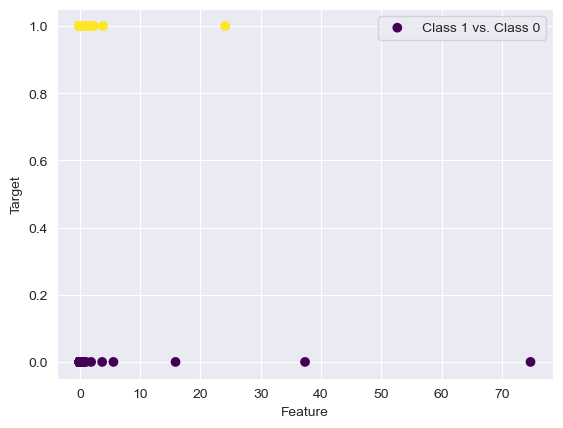

In [21]:
plt.scatter(X_train, y_train, c=y_train, cmap='viridis', label="Class 1 vs. Class 0")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()

In [22]:
log_data = df.copy()

In [23]:
log_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205124 entries, 1 to 358532
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   sisu              205124 non-null  object
 1   emtak_tekstina    205124 non-null  object
 2   riik_tekstina     205124 non-null  object
 3   ehak_nimetus      205124 non-null  object
 4   kapitali_suurus   205124 non-null  object
 5   kapitali_valuuta  205124 non-null  object
 6   algus_kpv         205124 non-null  object
 7   staatus           205124 non-null  object
 8   label             205124 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 15.6+ MB


In [24]:
# Under sample data

df_majority = df[df['label'] == 0]
df_minority = df[df['label'] == 1]

df_majority_undersampled = resample(df_majority, replace=False, n_samples=15000, random_state=42)
df_minority_undersampled = resample(df_minority, replace=True, n_samples=15000, random_state=42)
df_undersampled = pd.concat([df_majority_undersampled, df_minority_undersampled])
df_undersampled = df_undersampled.sample(frac=1, random_state=42)
print(df_undersampled['label'].value_counts())

0    15000
1    15000
Name: label, dtype: int64


In [25]:
df_undersampled.head()

,sisu,emtak_tekstina,riik_tekstina,ehak_nimetus,kapitali_suurus,kapitali_valuuta,algus_kpv,staatus,label
52917,Drivz OÜ,"Muu reisimisega seotud reserveerimine, sh giid...",Eesti,Harju maakond,2500.00,EUR,15.02.2018,Registrisse kantud,0
293099,SKA Trade OÜ,Muu puhastustegevus,Eesti,Harju maakond,2500.00,EUR,25.03.2020,Likvideerimisel,1
189947,Odrakunn OÜ,Muu ehitiste viimistlus ja lõpetamine,Eesti,Harju maakond,2500.00,EUR,23.10.2023,Likvideerimisel,1
80943,GLOBAL ESG MASTERMINDS OÜ,Muud eriehitustööd,Eesti,Harju maakond,2500.00,EUR,07.11.2023,Likvideerimisel,1
20809,Arkilla OÜ,Rõivaste jaemüük,Eesti,Harju maakond,2500.00,EUR,21.05.2019,Registrisse kantud,0


In [26]:
# Encode categorical data
def encoder_categorical(df, column):
    le = LabelEncoder()
    df[column] = le.fit_transform(list(df[column]))
    return df
county_list = encoder_categorical(df_undersampled, "ehak_nimetus")
country_list = encoder_categorical(df_undersampled, "riik_tekstina")
currency_list = encoder_categorical(df_undersampled, "kapitali_valuuta")
emtak_list = encoder_categorical(df_undersampled, "emtak_tekstina")
status_list = encoder_categorical(df_undersampled, "staatus")



In [27]:
df_undersampled.head()

,sisu,emtak_tekstina,riik_tekstina,ehak_nimetus,kapitali_suurus,kapitali_valuuta,algus_kpv,staatus,label
52917,Drivz OÜ,335,0,0,2500.00,1,15.02.2018,3,0
293099,SKA Trade OÜ,331,0,0,2500.00,1,25.03.2020,1,1
189947,Odrakunn OÜ,312,0,0,2500.00,1,23.10.2023,1,1
80943,GLOBAL ESG MASTERMINDS OÜ,348,0,0,2500.00,1,07.11.2023,1,1
20809,Arkilla OÜ,508,0,0,2500.00,1,21.05.2019,3,0


In [28]:
x = df_undersampled[["emtak_tekstina", "riik_tekstina", "ehak_nimetus", "kapitali_suurus", "kapitali_valuuta"]]

C:\Users\kevin\AppData\Local\Temp\ipykernel_21672\858814812.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = sb.heatmap(x.corr(), annot=True)


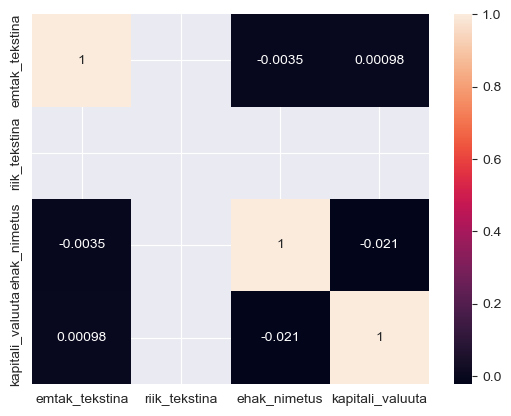

In [29]:
import seaborn as sb
correlation = sb.heatmap(x.corr(), annot=True)
fig = correlation.get_figure()

In [30]:
Y = df_undersampled["label"]

In [31]:
# Encode categorical data
onehotencoder = OneHotEncoder()
X_encoded = onehotencoder.fit_transform(x).toarray()

In [32]:
# Train model

X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = RandomForestClassifier(n_estimators=50)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [33]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.694

In [34]:
y_train_pred = model.predict(X_train)
accuracy_score(y_train, y_train_pred)

0.766625

In [35]:
y_prob = model.predict_proba(X_test)
auc = roc_auc_score(y_test, y_prob[:, 1])
print('AUC: %.2f' % auc)

AUC: 0.78
